# AdaBoost own class implementation


In this task we implement own **AdaBoost** class and investigate its performance solving [Mushroom Data Set
](https://archive.ics.uci.edu/ml/datasets/mushroom)

## Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

### Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Plan 

1. Prepare data from training

2. Using `sklearn` implement a single `DecisionTreeClassifier` with depth=1 and estimate its performance on the given `*Mushroom* Data Set`.

3. Implement and estimate the performance of `AdaBoost` model using `sklearn` solution. As a base model we use `DecisionTreeClassifier` with depth=1

4. Implement own `AdaBoostClassifier` from scratch by following the algorithm pseudocode and compare its performance with the `sklearn` solution:

```
class AdaBoostClassifier_Sratch():
    def __init__(self, base_estimator=None, n_estimators=10):
        pass

    def fit(self, X, y):
        pass

    def predict(X):
        pass
```

5. We plot the accuracy of the model against the number of estimators used.

### Realization

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

import collections

# Load in the data and define the column labels
df = pd.read_csv('https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/AdaBoost/agaricus-lepiota.csv',header=None)
df = df.sample(frac=1)
df.columns = ['target','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
             'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
             'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
             'habitat']
# set X and y 
X = df.drop(columns="target") 
y = df.target
df.head(2)

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3076,e,f,f,e,t,n,f,c,b,n,...,s,w,g,p,w,o,p,n,y,d
4196,p,x,y,n,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,d


### Encode the labels

In [300]:
encoder_dict = collections.defaultdict(LabelEncoder)
labeled_df = df.apply(lambda x: encoder_dict[x.name].fit_transform(x))
labeled_df.head(2)

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3076,0,2,0,2,1,5,1,0,0,5,...,2,7,3,0,2,1,4,3,5,0
4196,1,5,3,4,0,8,1,0,1,0,...,1,6,6,0,2,1,0,7,4,0


### Split on train / test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(labeled_df.drop('target', axis=1), labeled_df.target, train_size=0.15, random_state=12)

### Check the DT results


In [291]:
dt_1 = DecisionTreeClassifier() # Set estimator
dt_1.fit(X_train, y_train) # fit
display('accouracy rate {}'.format(accuracy_score(y_test, dt_1.predict(X_test)))) # print result

'accouracy rate 0.9973935708079931'

### Test AdaBoostClassifier 

In [297]:
acc = []
for i in range(1, 51):
    dt_1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=i)
    dt_1.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, dt_1.predict(X_test)))
    
display('mean accouracy rate for AdaBoostClassifier is {}'.format(np.mean(acc))) # print result

'mean accouracy rate for AdaBoostClassifier is 0.9995366348103097'

### Own boost class 

In [301]:
class DesionTreeClass():
    def __init__(self, X_train, X_test, y_train, y_test, n_estimators):
        # set initial variables 
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.n_estimators = n_estimators
        self.alpha = []
        self.models = []
        self.accuracy = []
        self.predictions = []
        
    def fit(self):
        # make a copy 
        X = self.X_train
        Y = self.y_train.where(self.y_train==1,-1)
        # set empty df
        weights = pd.DataFrame(Y.copy())
        weights['weight'] = 1 / len(X)
        # set empty lists
        alpha = []
        models = []
        for i in range(self.n_estimators):
            # set model and append 
            model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
            models.append(model)
            # fit model with weights
            model.fit(X, Y, sample_weight=np.array(weights['weight']))
            # get acc
            pred = model.predict(X)
            # remember results
            weights['pred'] = pred
            weights['eval'] = np.where(weights['pred'] == weights['target'],1,0)
            weights['mis_eval'] = np.where(weights['pred'] != weights['target'],1,0)
            # acc rate and error rate
            acc__ = sum(weights['eval']) / len(weights['eval'])
            miss_eval = sum(weights['mis_eval'] / len(weights['mis_eval']))
            err = np.sum(weights['weight'] * weights['mis_eval']) / np.sum(weights['weight'])
            # calc alpha and append to list
            alpha_ = np.log((1 - err) / err)
            alpha.append(alpha_)
            # update weights
            weights['weight'] *= np.exp(alpha_ * weights['mis_eval'])
            
        # update the self list of aplha
        self.alpha = alpha
        self.models = models
        
        return self
    
    def predict(self):
        # copy data
        X = self.X_test
        Y = self.y_test.where(self.y_test==1,-1)
        # set empty list
        predictions = []
        # iterate on alphas and models
        for i, g in zip(self.alpha, self.models):
            # calc predictions with all alpha and models, and append results
            pred = i * g.predict(X)
            predictions.append(pred)
            # update the accuracy 
            self.accuracy.append(np.sum(np.sign(np.sum(np.array(predictions), axis=0))==Y.values) / len(predictions[0]))
        # update class predictions
        self.predictions = np.sign(np.sum(np.array(predictions), axis=0))

# create class instance with 50 estimators
dt = DesionTreeClass(X_train, X_test, y_train, y_test, 50)

### Use class to predict with on Train and Test data

In [302]:
dt.fit()
dt.predict()

### Result of own class

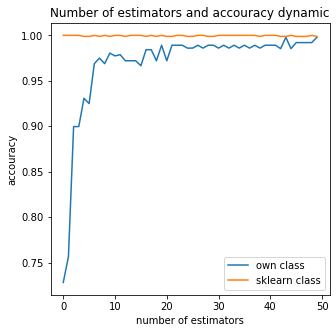

In [304]:
plt.figure(figsize=(5, 5))
plt.plot(range(0, 50), dt.accuracy, label='own class')
plt.plot(range(0, 50), acc, label='sklearn class')
plt.legend()
plt.xlabel('number of estimators')
plt.ylabel('accouracy')
plt.title('Number of estimators and accouracy dynamic')
plt.show();

### Conclusion

After more than 50 estimators own class realization converge with AdaBoostClassifier sklearn class.